In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/covid19_merged.csv')

In [5]:
df.shape

(173, 65)

## Missing Values

In [11]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Flu_pneumonia_death_rate_per_100000               18
h1n1_Geographic_spread                            81
h1n1_Intensity                                   103
h1n1_Impact_on_healthcare_services               103
h1n1_Cases_underestimate                          18
h1n1_Cases_confirmed                              18
h1n1_Deaths_confirmed                             18
first_school_closure_date                         20
code_2digit_x                                      2
code_3digit_x                                      1
jan_temp                                          19
feb_temp                                          19
mar_temp                                          19
apr_temp                                          19
may_temp                                          19
jun_temp                                          19
july_temp                                         19
aug_temp                                          19
sept_temp                                     

,Types,Head
Median_age,object,"[18, 36, 29]"
Urban_pop_pct,object,"[25%, 63%, 73%]"
sex_male_to_female_total,object,"[1.03, 0.98, 1.03]"
Density_KM2m,object,"[60, 105, 18]"
covid19_first_date,object,"[2020-02-24 22:00:00, 2020-03-09 22:00:00, 202..."
...,...,...
Jun_precip,float64,"[4.55918496175, 54.5791675258, 3.3737396628900..."
covid_recovered_4_2_20,int64,"[10, 76, 61]"
covid_deaths_4_2_20,int64,"[6, 16, 86]"
covid_confirmed_4_2_20,int64,"[273, 277, 986]"


In [66]:
#Columns without tempeture and precipitation
columns = [x for x in list(df.columns) if 'temp' not in x]
columns = [x for x in columns if 'precip' not in x]
df_no_weather = df[columns]
columns_weather = [x for x in list(df.columns) if x not in columns]

## Some plots

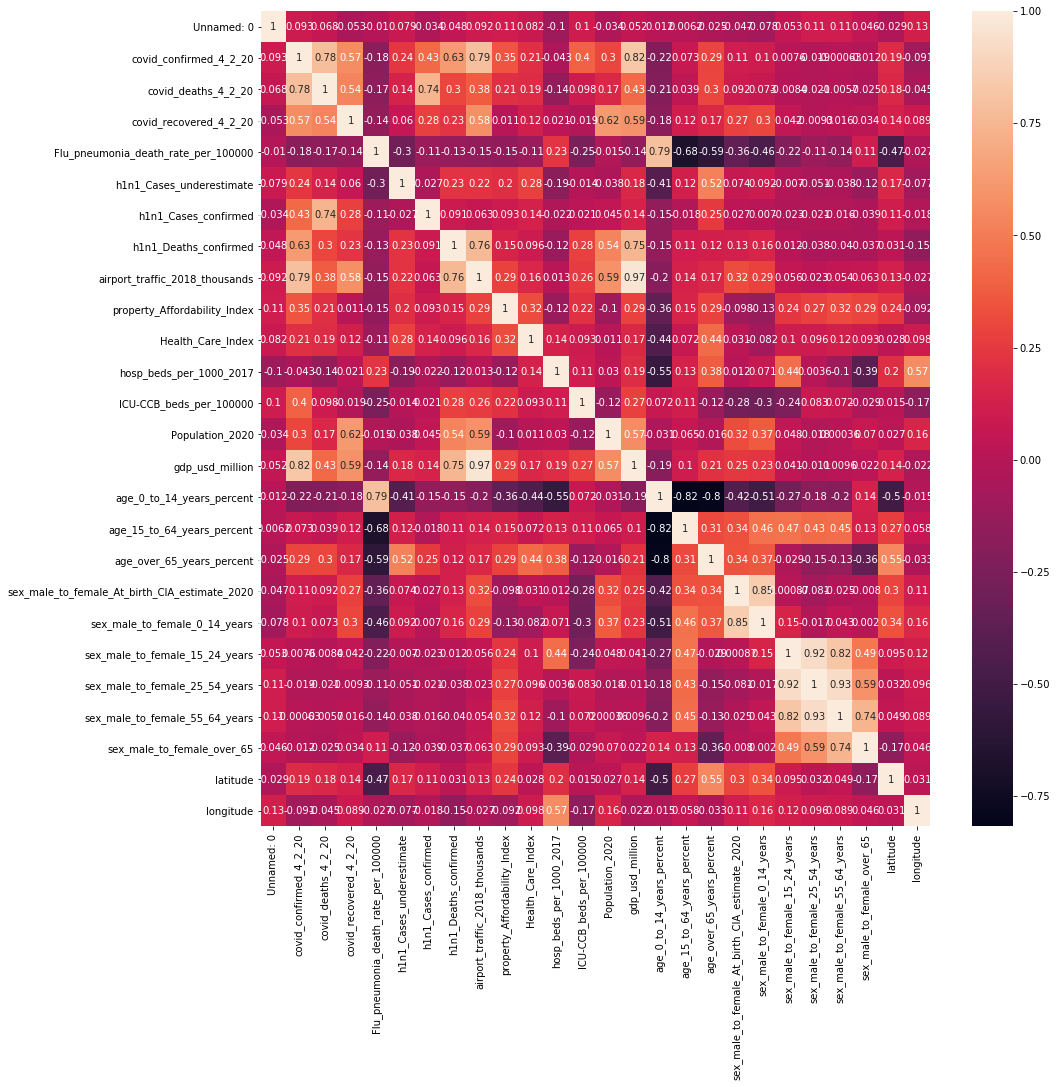

In [34]:
corr = df_no_weather.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)

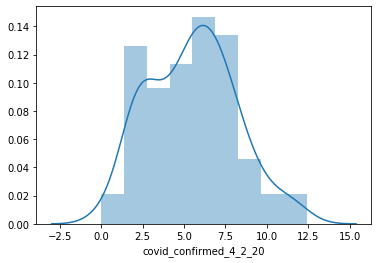

In [53]:
ax = sns.distplot(np.log(df[df['covid_confirmed_4_2_20']>0]['covid_confirmed_4_2_20']));
plt.show()

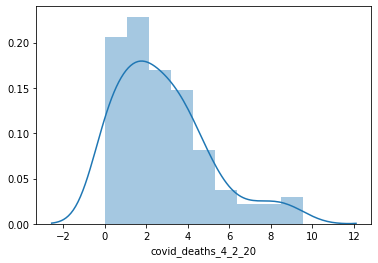

In [51]:
ax = sns.distplot(np.log(df[df['covid_deaths_4_2_20']>0]['covid_deaths_4_2_20']));
plt.show()

## Data Cleaning

In [72]:
from sklearn.model_selection import train_test_split
#Dropping predicted and not useful variables and splitting into X and Y
X_df = df.drop(['covid_deaths_4_2_20', 'covid_recovered_4_2_20', 'latitude', 'longitude', 'Unnamed: 0'] + columns_weather, axis=1).copy()
Y_df = df['covid_deaths_4_2_20'].copy()

In [73]:
#Using Sklearn Library
X_train_or, X_test_or, Y_train_or, Y_test_or = train_test_split(X_df, Y_df, 
                                                    test_size=0.2, 
                                                    random_state=2)

#To delete SettingWithCopyWarning
X_train = X_train_or.copy()
X_test = X_test_or.copy()
Y_train = Y_train_or.copy()
Y_test = Y_test_or.copy()

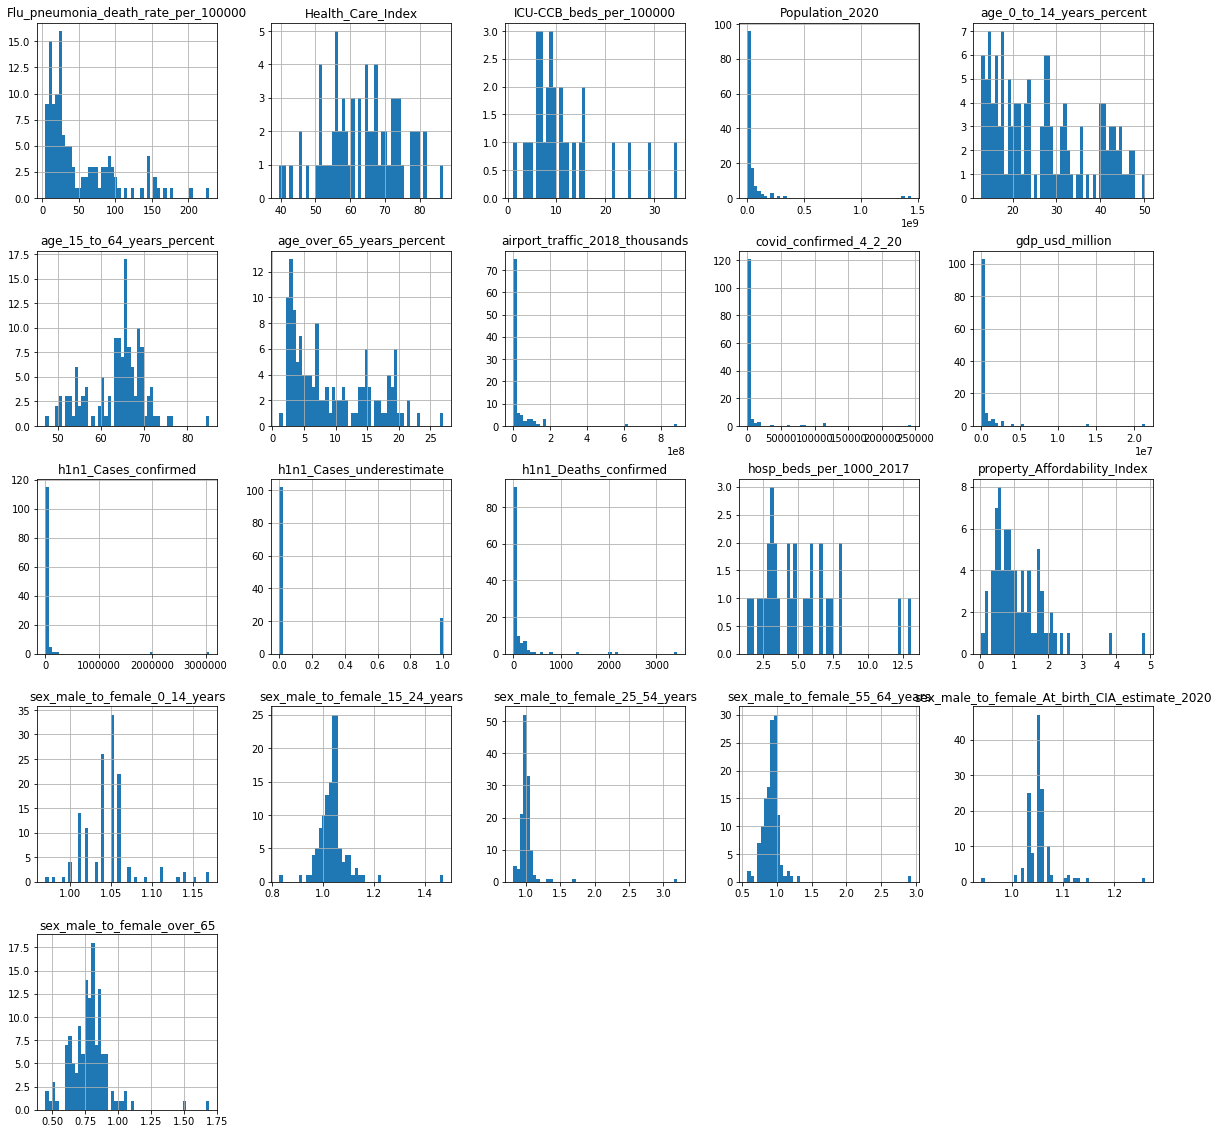

In [74]:
#Some transformation libraries
from sklearn.preprocessing import (PowerTransformer, StandardScaler, 
                                   MinMaxScaler, LabelEncoder, OneHotEncoder)
X_train_or.hist(bins=50, figsize=(20,20))
plt.show()

In [88]:
def h1n1_intensity(row):
    if row.h1n1_Intensity == '***':
        row.h1n1_Intensity = 3
    elif row.h1n1_Intensity == '**':
        row.h1n1_Intensity = 2
    elif row.h1n1_Intensity == '*':
        row.h1n1_Intensity = 1
    else:
        row.h1n1_Intensity = 0
    
    return row

In [90]:
X_train.apply(lambda x: h1n1_intensity(x), axis=1)

,country,covid_confirmed_4_2_20,covid19_first_date,Flu_pneumonia_death_rate_per_100000,h1n1_Geographic_spread,h1n1_Intensity,h1n1_Impact_on_healthcare_services,h1n1_Cases_underestimate,h1n1_Cases_confirmed,h1n1_Deaths_confirmed,...,age_0_to_14_years_percent,age_15_to_64_years_percent,age_over_65_years_percent,sex_male_to_female_At_birth_CIA_estimate_2020,sex_male_to_female_0_14_years,sex_male_to_female_15_24_years,sex_male_to_female_25_54_years,sex_male_to_female_55_64_years,sex_male_to_female_over_65,sex_male_to_female_total
79,Ireland,3849,2020-02-29 22:00:00,15.91,W,3,mod,1.0,3189.0,26.0,...,21.6,64.4,13.9,1.06,1.05,1.03,1.01,1.00,0.86,1
113,Nepal,6,2020-01-25 22:00:00,47.23,R,1,low,0.0,172.0,3.0,...,30.9,63.3,5.8,1.04,1.07,1.00,0.82,0.95,0.86,0.95
85,Kazakhstan,435,2020-03-13 22:00:00,26.61,R,2,mod,0.0,17.0,0.0,...,27.9,65.1,7.0,0.94,0.98,1.04,0.95,0.78,0.53,0.92
93,Liberia,6,2020-03-16 22:00:00,124.54,NaN,0,NaN,NaN,NaN,NaN,...,41.8,55.1,3.1,1.03,1.02,0.97,0.99,0.93,0.97,0.99
48,Ecuador,3163,2020-03-01 22:00:00,38.70,W,1,low,0.0,2251.0,200.0,...,28.4,64.5,7.1,1.05,1.04,1.03,0.95,0.96,0.91,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,Denmark,3573,2020-02-27 22:00:00,17.12,W,1,NaN,1.0,651.0,33.0,...,16.5,63.8,19.7,1.06,1.05,1.04,0.99,0.99,0.81,0.97
22,Brazil,8044,2020-01-23 12:00:00,42.96,R,1,mod,1.0,58178.0,2135.0,...,21.7,69.7,8.6,1.05,1.04,1.03,0.98,0.89,0.74,0.97
72,Honduras,219,2020-03-11 22:00:00,16.61,W,1,low,0.0,560.0,18.0,...,31.6,63.7,4.7,1.05,1.04,1.04,1.02,0.88,0.77,1.01
15,Belarus,304,2020-02-28 22:00:00,5.19,W,2,mod,0.0,102.0,88.0,...,16.7,68.5,14.8,1.06,1.06,1.06,0.97,0.79,0.46,0.87


In [91]:
df_indicators = pd.read_csv('../data/jobs_indicators.csv')

In [92]:
df_indicators

,Unnamed: 0,Country name,Country Code,Region,Region Code,Year of Survey,Survey Type,Subsample,Total population,Children (aged 0-14),...,Real Median Monthly Wages in USD (base 2010) (PPP adjusted),Median Earnings for wage workers per month in agriculture (local nominal currenc),Median Earnings for wage workers per month in industry (local nominal currency),Median Earnings for wage workers per month in service (local nominal currency),Female to Male gender wage gap,Public to Private wage gap,No Education,Primary Education,Secondary Education,Post Secondary Education
0,0,Afghanistan,AFG,South Asia,SAS,2007,nrva,Female,12152827,0.48,...,NaN,NaN,NaN,NaN,NaN,NaN,0.87,0.04,0.08,0.02
1,1,Afghanistan,AFG,South Asia,SAS,2007,nrva,Higher education,7407306,0.71,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.70,0.30
2,2,Afghanistan,AFG,South Asia,SAS,2007,nrva,Lower education,17521661,0.39,...,NaN,NaN,NaN,NaN,NaN,NaN,0.88,0.07,0.05,0.00
3,3,Afghanistan,AFG,South Asia,SAS,2007,nrva,Male,12776140,0.49,...,NaN,NaN,NaN,NaN,NaN,NaN,0.62,0.09,0.22,0.08
4,4,Afghanistan,AFG,South Asia,SAS,2007,nrva,Old worker,7497719,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.84,0.04,0.07,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6828,6828,Zimbabwe,ZWE,Sub-Saharan Africa,SSF,2011,lfs,Male,5719590,0.44,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.13,0.82,0.03
6829,6829,Zimbabwe,ZWE,Sub-Saharan Africa,SSF,2011,lfs,Old worker,4043104,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.18,0.75,0.02
6830,6830,Zimbabwe,ZWE,Sub-Saharan Africa,SSF,2011,lfs,Rural,8175111,0.45,...,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.19,0.74,0.01
6831,6831,Zimbabwe,ZWE,Sub-Saharan Africa,SSF,2011,lfs,Total,11913883,0.42,...,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.15,0.79,0.02
